#Hiearchical

In [98]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.cluster import DBSCAN


In [7]:
data=pd.read_excel(r"C:\Users\hites\Downloads\EastWestAirlines.xlsx",sheet_name='data')
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [9]:
data.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [12]:
data.drop(['ID#', 'Qual_miles','Award?'], axis = 1, inplace = True)
data

,Balance,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,1,1,1,174,1,0,0,7000
1,19244,1,1,1,215,2,0,0,6968
2,41354,1,1,1,4123,4,0,0,7034
3,14776,1,1,1,500,1,0,0,6952
4,97752,4,1,1,43300,26,2077,4,6935
...,...,...,...,...,...,...,...,...,...
3994,18476,1,1,1,8525,4,200,1,1403
3995,64385,1,1,1,981,5,0,0,1395
3996,73597,3,1,1,25447,8,0,0,1402
3997,54899,1,1,1,500,1,500,1,1401


In [14]:
scaler = StandardScaler()
df= scaler.fit_transform(data.iloc[:,0:])
df

array([[-4.51140783e-01, -7.69578406e-01, -9.82418871e-02, ...,
        -3.28603258e-01, -3.62167870e-01,  1.39545434e+00],
       [-5.39456874e-01, -7.69578406e-01, -9.82418871e-02, ...,
        -3.28603258e-01, -3.62167870e-01,  1.37995704e+00],
       [-3.20031232e-01, -7.69578406e-01, -9.82418871e-02, ...,
        -3.28603258e-01, -3.62167870e-01,  1.41192021e+00],
       ...,
       [-4.29480975e-05,  6.83121167e-01, -9.82418871e-02, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31560393e+00],
       [-1.85606976e-01, -7.69578406e-01, -9.82418871e-02, ...,
         2.85309024e-02, -9.85033311e-02, -1.31608822e+00],
       [-7.00507951e-01, -7.69578406e-01, -9.82418871e-02, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31754109e+00]])

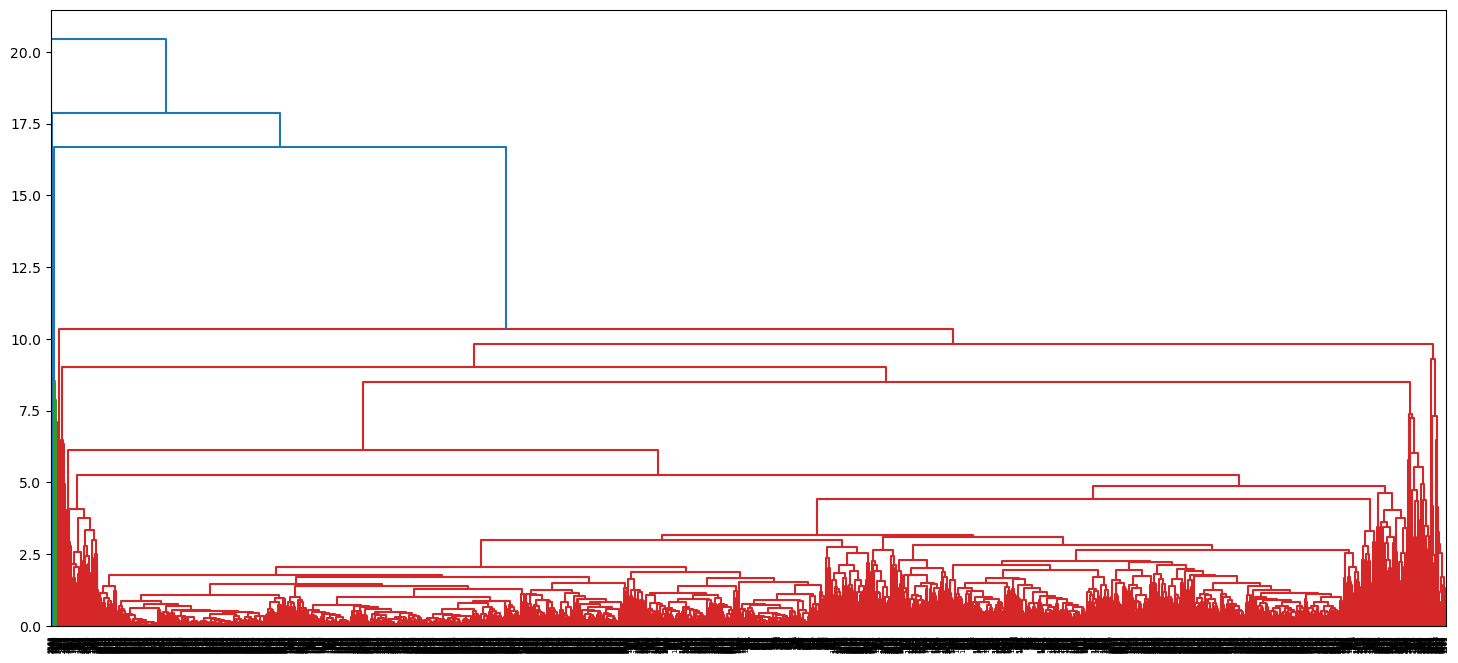

In [27]:
plt.figure(figsize = (18,8))
dendrogram = sch.dendrogram(sch.linkage(df, method='average'))

In [76]:
hc = AgglomerativeClustering(n_clusters =30,
                             affinity = 'euclidean',
                             linkage = 'average')

In [77]:
y_hc = hc.fit_predict(df)
y_hc

array([9, 9, 9, ..., 9, 9, 9], dtype=int64)

In [78]:
Clusters = pd.DataFrame(y_hc, columns=['Clusters'])
Clusters

,Clusters
0,9
1,9
2,9
3,9
4,9
...,...
3994,9
3995,9
3996,9
3997,9


In [79]:
data['h_clusterid'] = Clusters
data

,Balance,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,h_clusterid
0,28143,1,1,1,174,1,0,0,7000,9
1,19244,1,1,1,215,2,0,0,6968,9
2,41354,1,1,1,4123,4,0,0,7034,9
3,14776,1,1,1,500,1,0,0,6952,9
4,97752,4,1,1,43300,26,2077,4,6935,9
...,...,...,...,...,...,...,...,...,...,...
3994,18476,1,1,1,8525,4,200,1,1403,9
3995,64385,1,1,1,981,5,0,0,1395,9
3996,73597,3,1,1,25447,8,0,0,1402,9
3997,54899,1,1,1,500,1,500,1,1401,9


In [80]:
data[data['h_clusterid'] == 0]

,Balance,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,h_clusterid
135,259484,1,1,1,19172,26,7172,23,6723,0
323,278727,1,1,1,21666,19,9166,16,7155,0
511,9800,1,1,1,10348,34,3000,25,6651,0
549,256219,3,1,1,29823,33,6568,16,6561,0
622,62080,2,1,1,19113,32,10650,28,6434,0
683,369816,4,1,1,46942,35,7266,17,6340,0
914,210496,1,1,1,9022,24,4900,19,5953,0
958,13375,4,1,1,15732,43,9200,28,5916,0
976,20498,1,1,1,7826,20,7226,18,5491,0
1014,96827,1,1,1,12100,19,8100,17,5801,0


In [81]:
data.sort_values("h_clusterid")

,Balance,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,h_clusterid
549,256219,3,1,1,29823,33,6568,16,6561,0
1676,51304,1,1,1,11611,40,10075,36,4708,0
1529,57857,1,1,1,62650,37,12400,29,4996,0
2217,109103,1,1,1,19600,27,7600,24,3739,0
2375,92843,1,1,1,27650,29,9150,26,3530,0
...,...,...,...,...,...,...,...,...,...,...
602,117623,5,1,1,86582,26,1000,6,6477,27
3490,189077,4,1,1,54353,27,100,1,542,27
1999,327126,5,1,1,97997,25,350,3,4440,27
488,1199220,1,1,1,3800,19,3300,18,8023,28


#K means

In [95]:
data1=data[['Balance','cc1_miles','cc2_miles','cc3_miles','Bonus_miles','Bonus_trans','Flight_miles_12mo','Flight_trans_12','Days_since_enroll']]
data1

,Balance,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,1,1,1,174,1,0,0,7000
1,19244,1,1,1,215,2,0,0,6968
2,41354,1,1,1,4123,4,0,0,7034
3,14776,1,1,1,500,1,0,0,6952
4,97752,4,1,1,43300,26,2077,4,6935
...,...,...,...,...,...,...,...,...,...
3994,18476,1,1,1,8525,4,200,1,1403
3995,64385,1,1,1,981,5,0,0,1395
3996,73597,3,1,1,25447,8,0,0,1402
3997,54899,1,1,1,500,1,500,1,1401


In [86]:
wcss = []
sil_score = []
cal_haz_score = []

for i in range(1,50 ):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
    if i==1:
        continue 
    sil_score.append(silhouette_score(df, kmeans.labels_))
    cal_haz_score.append(calinski_harabasz_score(df, kmeans.labels_))

In [87]:
wcss

[35991.00000000001,
 28108.98082799196,
 23651.598596835185,
 19900.34194384957,
 17993.52710144425,
 14565.798092806343,
 13044.904890239168,
 11893.559909047135,
 10796.687882472457,
 10110.415259708207,
 9638.612174065987,
 9104.650316542797,
 8728.575505491935,
 8261.398095936303,
 7896.336239815818,
 7596.927480381398,
 7402.937541638624,
 7109.995979269054,
 6875.919803021342,
 6775.5787254581655,
 6509.786549775881,
 6341.716371814604,
 6119.708846103057,
 6002.04412424868,
 5935.889247599954,
 5800.064001309737,
 5630.44729277427,
 5523.583894733945,
 5408.910727868215,
 5314.898115944249,
 5268.562313983745,
 5142.6842850585945,
 5067.112113396984,
 4979.668948183018,
 4896.935273007134,
 4808.944981075348,
 4724.856668195245,
 4680.126672705547,
 4582.798833423068,
 4490.185695381197,
 4476.598980655245,
 4407.750794022977,
 4329.717612128251,
 4277.353832877311,
 4222.442673077998,
 4204.546815285706,
 4095.162885785254,
 4027.276188630618,
 3997.0492946781937]

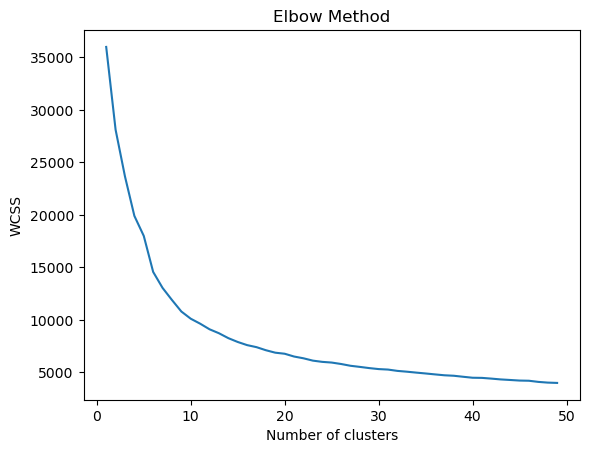

In [88]:
plt.plot(range(1, 50), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [89]:
clusters_new = KMeans(32, random_state = 42)
clusters_new.fit(df)

KMeans(n_clusters=32, random_state=42)

In [90]:
clusters_new.labels_

array([22, 22, 22, ...,  0, 25, 25])

In [96]:
data1['clusterid_new'] = clusters_new.labels_
data1

C:\Users\hites\AppData\Local\Temp\ipykernel_24260\2462391745.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['clusterid_new'] = clusters_new.labels_


,Balance,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,clusterid_new
0,28143,1,1,1,174,1,0,0,7000,22
1,19244,1,1,1,215,2,0,0,6968,22
2,41354,1,1,1,4123,4,0,0,7034,22
3,14776,1,1,1,500,1,0,0,6952,22
4,97752,4,1,1,43300,26,2077,4,6935,19
...,...,...,...,...,...,...,...,...,...,...
3994,18476,1,1,1,8525,4,200,1,1403,25
3995,64385,1,1,1,981,5,0,0,1395,25
3996,73597,3,1,1,25447,8,0,0,1402,0
3997,54899,1,1,1,500,1,500,1,1401,25


In [97]:
data1.sort_values('clusterid_new')

,Balance,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,clusterid_new
2924,89413,3,1,1,24667,21,0,0,1767,0
3456,63121,3,1,1,16634,16,150,1,1349,0
3462,12088,4,1,1,27292,17,100,1,1298,0
2844,66445,3,1,1,22276,13,0,0,1975,0
3067,63190,3,1,1,18950,13,250,1,3041,0
...,...,...,...,...,...,...,...,...,...,...
3062,27155,4,1,1,47252,15,300,1,3001,31
2647,194576,4,1,1,41315,16,550,1,2539,31
1893,50715,4,1,1,39211,13,0,0,4051,31
3199,55461,4,1,1,31658,17,500,2,2315,31


#DBSCAN

In [99]:
data2=data[['Balance','cc1_miles','cc2_miles','cc3_miles','Bonus_miles','Bonus_trans','Flight_miles_12mo','Flight_trans_12','Days_since_enroll']]
data2

,Balance,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,1,1,1,174,1,0,0,7000
1,19244,1,1,1,215,2,0,0,6968
2,41354,1,1,1,4123,4,0,0,7034
3,14776,1,1,1,500,1,0,0,6952
4,97752,4,1,1,43300,26,2077,4,6935
...,...,...,...,...,...,...,...,...,...
3994,18476,1,1,1,8525,4,200,1,1403
3995,64385,1,1,1,981,5,0,0,1395
3996,73597,3,1,1,25447,8,0,0,1402
3997,54899,1,1,1,500,1,500,1,1401


In [101]:
dbscan = DBSCAN(eps = 0.4, min_samples = 5)
dbscan.fit(df)

DBSCAN(eps=0.4)

In [102]:
dbscan.labels_

array([ 0,  0,  0, ..., -1,  0,  0], dtype=int64)

In [103]:
cl = pd.DataFrame(dbscan.labels_, columns = ['cluster'])
cl

,cluster
0,0
1,0
2,0
3,0
4,-1
...,...
3994,0
3995,0
3996,-1
3997,0


In [104]:
clustered = pd.concat([data2, cl], axis = 1)
clustered

,Balance,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,cluster
0,28143,1,1,1,174,1,0,0,7000,0
1,19244,1,1,1,215,2,0,0,6968,0
2,41354,1,1,1,4123,4,0,0,7034,0
3,14776,1,1,1,500,1,0,0,6952,0
4,97752,4,1,1,43300,26,2077,4,6935,-1
...,...,...,...,...,...,...,...,...,...,...
3994,18476,1,1,1,8525,4,200,1,1403,0
3995,64385,1,1,1,981,5,0,0,1395,0
3996,73597,3,1,1,25447,8,0,0,1402,-1
3997,54899,1,1,1,500,1,500,1,1401,0


In [121]:
clustered[clustered['cluster'] == 10]

,Balance,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,cluster
2637,145214,1,1,1,3500,4,500,1,2560,10
2758,125274,1,1,1,3150,4,550,2,2194,10
2788,148976,1,1,1,2650,3,650,2,2108,10
3035,178010,1,1,1,5500,4,500,1,2777,10
3244,103200,1,1,1,500,1,500,1,2062,10
3289,132871,1,1,1,300,3,200,2,1719,10
3308,131366,1,1,1,1500,2,500,1,1999,10


In [122]:
clustered.sort_values('cluster')

,Balance,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,cluster
1999,327126,5,1,1,97997,25,350,3,4440,-1
1411,8723,5,1,1,77923,15,0,0,5231,-1
1410,176982,1,1,1,2299,9,0,0,5234,-1
3149,11109,5,1,1,53627,13,0,0,2623,-1
1407,22533,4,1,1,22206,17,100,1,5248,-1
...,...,...,...,...,...,...,...,...,...,...
2758,125274,1,1,1,3150,4,550,2,2194,10
2637,145214,1,1,1,3500,4,500,1,2560,10
3035,178010,1,1,1,5500,4,500,1,2777,10
3308,131366,1,1,1,1500,2,500,1,1999,10
